# Plots for SLR207 project

### Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import FuncFormatter


### Fetching the data

In [3]:
# Read CSV file into DataFrame
df = pd.read_csv('data.csv')

# Display the first few rows of the DataFrame
print(df.head())

   Number_of_processes  Size_of_input  Execution_time  Sync_time  \
0                    1      344847006           29998      13286   
1                    1      344847006           31913      14965   
2                    1      344847006           31262      13817   
3                    1      344847006           30588      13599   
4                    1      344847006           30999      13960   

   Computation_time  
0             16712  
1             16948  
2             17445  
3             16989  
4             17039  


In [31]:
# Function to convert bytes to a more human-readable format
def convert_size(size_bytes):
    """
    Convert bytes to a more human-readable format (e.g., KB, MB, GB, TB).
    """
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = int(round(size_bytes / p, 0))
    return "%s %s" % (s, size_name[i])

# Example usage
print(convert_size(344847006))

329 MB


## Execution time vs number of machine used

The plot depicts how the execution time of a computational task varies with the number of machines allocated for parallel processing. Each data point on the plot represents an experiment where the task was executed with a specific configuration of machines, and the resulting execution time was recorded.


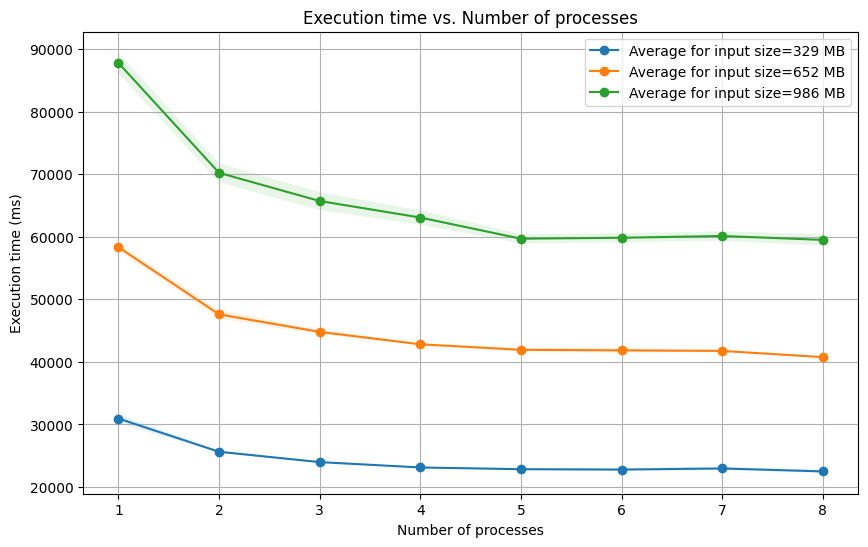

In [32]:
plt.figure(figsize=(10, 6))
for size_of_input, group in df.groupby('Size_of_input'):
    avg_execution_times = group.groupby('Number_of_processes')['Execution_time'].mean()
    std_execution_times = group.groupby('Number_of_processes')['Execution_time'].std()
    parameter_values = group['Number_of_processes'].unique()
    plt.plot(parameter_values, avg_execution_times, marker='o', label=f'Average for input size={convert_size(size_of_input)}')
    plt.fill_between(parameter_values, 
                 np.array(avg_execution_times) - np.array(std_execution_times), 
                 np.array(avg_execution_times) + np.array(std_execution_times),
                 alpha=0.1)
plt.xlabel('Number of processes')
plt.ylabel('Execution time (ms)')
plt.title('Execution time vs. Number of processes')
plt.legend()
plt.grid(True)
plt.show()

## Speedup vs number of processes

Speedup is a metric used to measure how much faster a parallel algorithm or system performs compared to a sequential (single-threaded or single-processor) version of the same algorithm or system. It quantifies the improvement in performance gained by using multiple processors or threads.

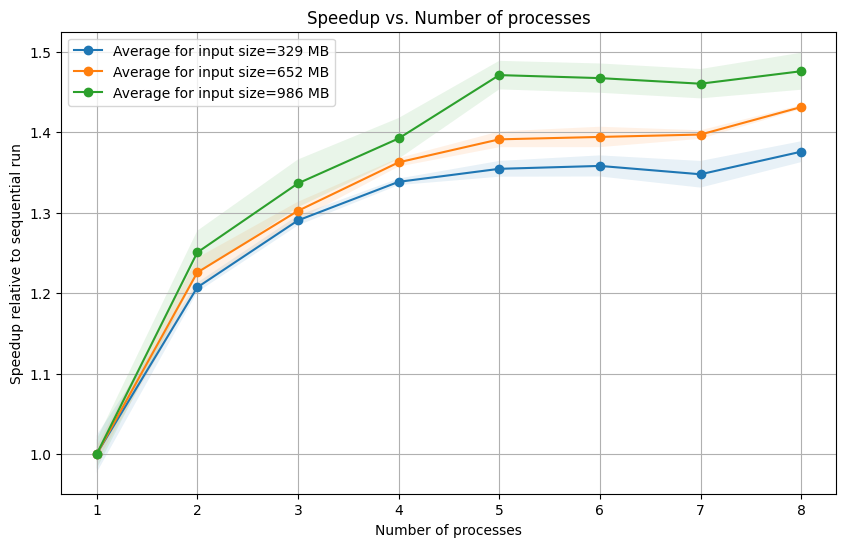

In [35]:
# Calculate average sequential execution time for each input size
avg_sequential_time = df[df['Number_of_processes'] == 1].groupby('Size_of_input')['Execution_time'].mean()

# Function to calculate speedup relative to sequential run
def calculate_speedup(row):
    input_size = row['Size_of_input']
    execution_time = row['Execution_time']
    return avg_sequential_time[input_size] / execution_time

# Apply the function to calculate speedup for each row
df['Speedup'] = df.apply(calculate_speedup, axis=1)


plt.figure(figsize=(10, 6))
for size_of_input, group in df.groupby('Size_of_input'):
    avg_execution_times = group.groupby('Number_of_processes')['Speedup'].mean()
    std_execution_times = group.groupby('Number_of_processes')['Speedup'].std()
    parameter_values = group['Number_of_processes'].unique()
    plt.plot(parameter_values, avg_execution_times, marker='o', label=f'Average for input size={convert_size(size_of_input)}')
    plt.fill_between(parameter_values, 
                 np.array(avg_execution_times) - np.array(std_execution_times), 
                 np.array(avg_execution_times) + np.array(std_execution_times),
                 alpha=0.1)
plt.xlabel('Number of processes')
plt.ylabel('Speedup relative to sequential run')
plt.title('Speedup vs. Number of processes')
plt.legend()
plt.grid(True)
plt.show()

## Synchronization/Computation Ratio

Synchronization/Computation Ratio is a metric that compares the time spent on synchronization tasks versus computation tasks in parallel computing environments. It helps in understanding how much of the total execution time is spent on coordinating processes or threads (synchronization) compared to performing actual computational work.

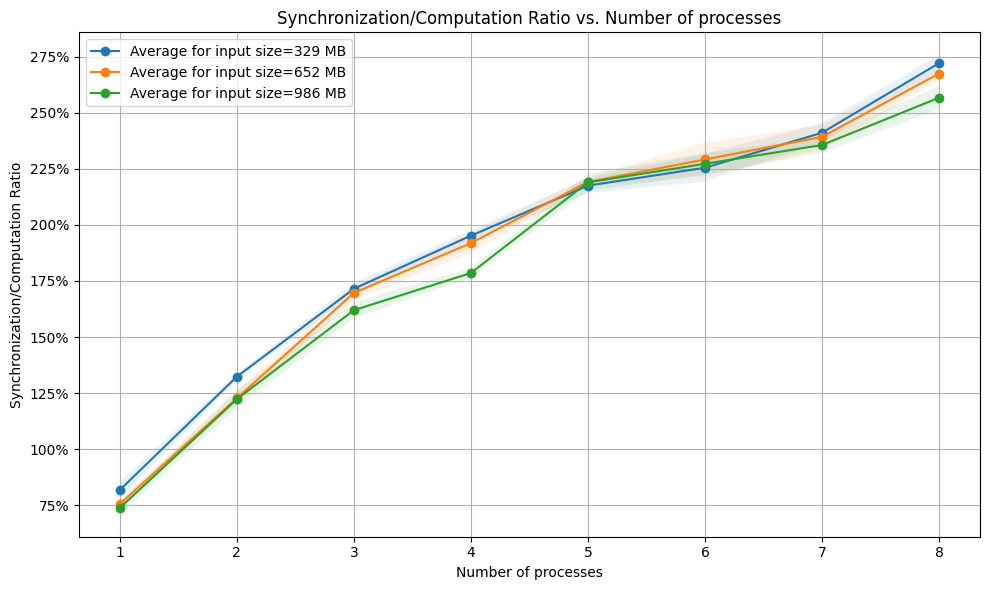

In [41]:
# Calculate synchronization/computation ratio
df['Sync_comp_ratio'] = df['Sync_time'] / df['Computation_time']

# Plotting
plt.figure(figsize=(10, 6))

# Plot Sync_comp_ratio
for size_of_input, group in df.groupby('Size_of_input'):
    avg_sync_comp_ratio = group.groupby('Number_of_processes')['Sync_comp_ratio'].mean()
    std_sync_comp_ratio = group.groupby('Number_of_processes')['Sync_comp_ratio'].std()
    parameter_values = group['Number_of_processes'].unique()
    plt.plot(parameter_values, avg_sync_comp_ratio, marker='o', label=f'Average for input size={convert_size(size_of_input)}')
    plt.fill_between(parameter_values, 
                     np.array(avg_sync_comp_ratio) - np.array(std_sync_comp_ratio), 
                     np.array(avg_sync_comp_ratio) + np.array(std_sync_comp_ratio),
                     alpha=0.1)

# Format y-axis as percentages
formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)

# Set labels and title
plt.xlabel('Number of processes')
plt.ylabel('Synchronization/Computation Ratio')
plt.title('Synchronization/Computation Ratio vs. Number of processes')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### Performance Analysis

The performance of our program was evaluated by examining two key metrics: speedup and the synchronization/computation ratio, as the number of processes was varied from 1 to 8.

1. **Speedup**:
   - **Observations**: The speedup values exhibit a notable increase from 1 (baseline with a single process) to 1.5 as the number of processes increases from 1 to 5. Beyond 5 processes, the speedup plateaus, maintaining an approximate value of 1.5 up to 8 processes.
   - **Interpretation**: The initial increase in speedup indicates that our program benefits from parallelization up to a certain point, with performance improvements due to the concurrent execution of tasks. However, the plateau observed beyond 5 processes suggests that adding more processes does not result in significant performance gains. This could be due to several factors, including overhead from process synchronization, communication delays, or inherent limitations in the parallelism of the algorithm.

2. **Synchronization/Computation Ratio**:
   - **Observations**: The synchronization/computation ratio increases linearly with the number of processes, starting from 75% with a single process and reaching 275% with 8 processes.
   - **Interpretation**: The linear increase in the synchronization/computation ratio indicates that as more processes are added, a larger proportion of the total execution time is spent on synchronization tasks relative to computation. This rising overhead can be attributed to the increased complexity of managing more processes, which necessitates more coordination and data exchange, thereby reducing the effective computational throughput.

### Conclusion

The performance analysis of our program, based on the speedup and synchronization/computation ratio metrics, reveals the following key insights:

- **Effective Parallelism**: The program demonstrates effective parallelism up to 5 processes, with a speedup of 1.5 times compared to the sequential execution. This suggests that the algorithm benefits from parallel execution within this range, leveraging multiple processes to reduce overall execution time.
- **Diminishing Returns**: Beyond 5 processes, the speedup plateaus, indicating diminishing returns from additional parallelism. This suggests that the overhead associated with managing more processes outweighs the benefits of further parallel execution. The primary contributing factor appears to be the increasing synchronization overhead.
- **Synchronization Overhead**: The linear increase in the synchronization/computation ratio from 75% to 275% highlights a growing overhead from synchronization tasks as the number of processes increases. This underscores the importance of optimizing synchronization mechanisms to enhance parallel efficiency, especially when scaling to a larger number of processes.

Overall, the program exhibits a moderate level of scalability, with effective performance improvements up to a certain number of processes. To achieve better scalability and performance, future efforts should focus on optimizing synchronization strategies and reducing communication overhead to better leverage the potential of parallel processing.